# DATASETS & DATALOADERS

我们希望数据集代码与模型训练代码分离，以获得更好的可读性和模块性。

torch.utils.data。DataLoader和torch.utils.data。允许您使用预加载数据集以及自己的数据集的数据集。

PyTorch域库提供了许多预加载的数据集（如FashionMNIST），这些数据集是torch.utils.data的子类。

一些参数

* root 训练、测试集存储路径
* train 指定训练、测试集
* download=True 如果root不存在，则从网上下载
* transform 特征字段转换
* target_transform 标签字段转换

In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [7]:
training_data = datasets.FashionMNIST(
    root='D:\\temp_files\\datasets',
    train=True,
    download=True,
    transform=ToTensor()    
)

test_data = datasets.FashionMNIST(
    root='D:\\temp_files\\datasets',
    train=False,
    download=True,
    transform=ToTensor()    
)

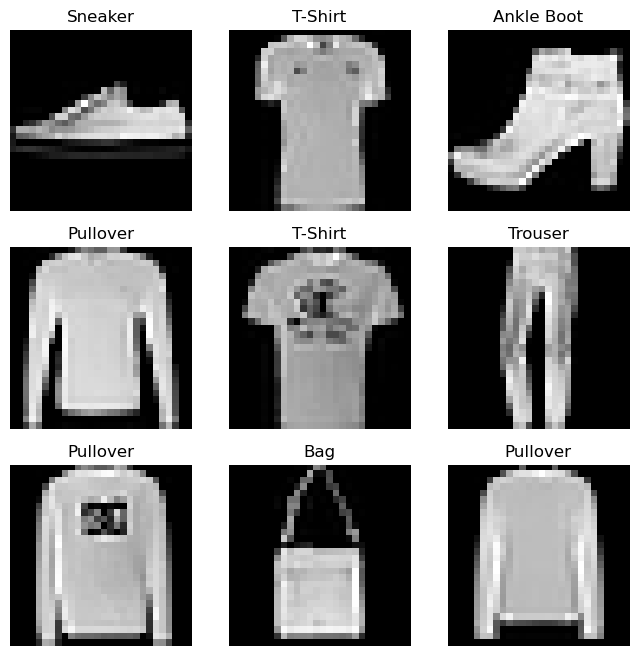

In [8]:
# 遍历并可视化数据
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainning_data),
                               size = (1, )).item()
    img, label = trainning_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# 为自己的的数据集创建一个非官方类

Dataset一次可以对一个样本作标签

必须实现三个接口
* \_\_init\_\_

    内部构造函数，我们初始化了数据集，数据集路径以及数据和标签的转换器

    注意到labels.csv是m行2列的数据 如：

    tshirt1.jpg, 0
    tshirt2.jpg, 0
* \_\_len\_\_

    长度内部函数，要返回数据集中的样本数
* \_\_getitem\_\_

    getitem内部函数，给出一个索引，要返回一个样本

    解决方案是基于本地的路径，将数据集中对应行的.jpg文件名取出

    然后使用read_image()函数读取，标签则只需在本地文件中的第二列读取即可

    数据和标签经过转换后作为返回值

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    
    def __init__(self, annotations_file, img_dir,
                 transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transfrom = transform
        self.target_transform = target_transform
    
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transfrom:
            image = self.transfrom(image)
        if self.target_transform:
            label = self.target_transform(lebel)
        return image, label

Dataset仅仅用于存放数据集，在训练时，要使用DataLoader，实现小批量混洗数据输送

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

我们已经将该数据集加载到DataLoader中，并可以根据需要迭代数据集。下面的每个迭代都返回一批train_features和train_labels（分别包含batch_size=64个特征和标签）。因为我们指定了shuffle=True，所以在我们遍历所有批次之后，数据将被打乱

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


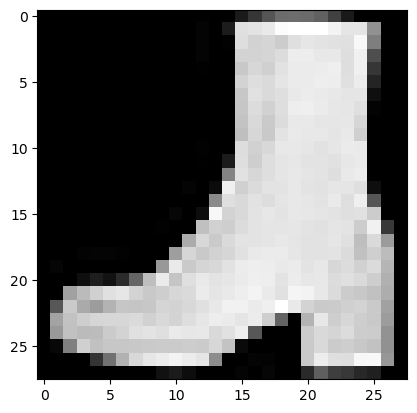

Label: 9


In [13]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")